# **Homework 9a**

In [55]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

### St. Petersburg paradox

***a)** Assuming that you are allowed to play this game once in a casino exactly as stated above, what would you yourself be willing to pay to enter the game (reasoning rationally, and momentarily forgetting any personal objections against gambling)?*

---

It is unreasonable to forget any personal objections since the value is based on what value we think we can win from this. However, if I would be forced to pay I would pay 5 (in SEK since it is a modern currency that I utilise). This means that I would profit from the 4th throw, which is a $0.5^4 = 0.0625$ probability of profiting. Most people would probably pay more or less the same as me considering the probability get lower and lower.

***b)** The formulation of the game and the estimate of its value as infinity makes several unrealistic assumptions, both from the player's point of view and from the casino's point of view. What are these assumptions?*

---

From the casino's point of view, the paradox assumes an infinite amount of resources in both time and capital to be able to continue the gamble. The player wouldn't be able to pay an infinite amount or wait an infinite time either.

The paradox also assumes that a rational and reasonable individual would not be willing to pay 20 ducats for the gamble which is where the paradox arises since the expected value is seemingly infinite. I reckon, people who enjoy the risk would gladly pay more and adjust their expectations. Humans have taken chances that are seemingly just as reckless and paid for more. Increasing the prize won't increase the risk so it simply depends on how much the individual has in disposible income since most individuals wouldn't risk all their possessions on chance. 

These unrealistic assumptions about human behaviour and lack of resource constraints lead to the St. Petersburg paradox.

***c)** One is that even a large casino does not have infinite resources, and would have to decide on a maximum number of rounds in the game to avoid going bankrupt. Assume that the maximum payout of the casino is X, and implement and perform a simulation that estimates the expected value of the game in this case.*

*Present the result of your simulations as a diagram that shows the average payoff calculated over the last n games as a function of n. Choose a suitable maximal number of games N yourself, repeat the simulation a number of times, and include the result of all simulations as well as a mean value in the diagram.*

---

I'm going to assume a payout could be exactly 10 million SEK, setting an upper bound $X = 10 000 000$ for a game. This is equivalent to $1 + floor(log_2(X)) = 24$ rounds maximum for each game, since we start at 1 ducat, before the value passes the maximum payout. The function below defines one simulation of $N$ games.

In [21]:
def simulation(x, N):
    X_max = 24 # log2(max_payout) maximal number of flips
    y = [*range(N)]
    sum = 0
    
    for n in range(1, N+1): # Simulates N games
        value = 1; # Amount of ducats
        
        i = 0 
        while i <= X_max:
            i += 1
            if random.randint(0, 1) == 1:
                break # 1 corresponds to flipping a cross, break when won        
            value += value 
            
        sum += value 
        y[n-1] = sum/n # Mean value of last n games
    return y;

I run the simulation $3$ times and set the maximal number of games to $N = 1 000 000$ so that the average will converge.

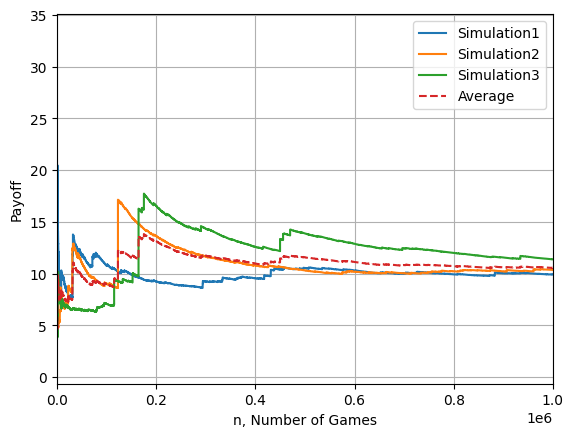

In [22]:
simul = 3
N = 1000000 # Number of games in each simulation
x = [*range(1, N+1)] # [1, ..., N]
y_tot = [0 for i in range(N)]

for i in range(simul):
    y = simulation(x, N)
    y_tot = np.add(y_tot, y)  
    plt.plot(x,y,label=("Simulation" + str(i+1)))

# Average of all simulations
y_tot = list(map(lambda y: y/simul, y_tot))
plt.plot(x,y_tot,label="Average", linestyle="dashed") 

# Plot settings
plt.grid()
plt.xlim((0,N))
plt.xlabel("n, Number of Games")
plt.ylabel("Payoff")
plt.legend(loc='upper right')
plt.show()

***d)** Discuss the convergence over time of your simulation. What value do you expect your simulation to converge to at large times?*

---

As seen by the graph in c), all the simulations converge to approximately 12-13. The Finite St. Peterburg lotteries solution to the paradox state that resources are finite and the expected value will grow logarithmically with the casino's resources. In these simulations this value is set to 10 million which corresponds to $L = 24$ rounds:

$E = \frac{L + 1}{2} = 12.5$

The simulation is expected to converge to $12.5$.

### Hospital visitors

*Simulate individual arrivals by successively generating random time intervals from one arrival to the next, and sum up the total number of arrivals each day. Show the results both as a time series of the number of patients per day, and as a histogram of the number of daily visitors collected over a longer time (at least a few years).*

---

Random arrival times between visitors for each are generated by drawing samples from an exponential distribution ``np.random.exponential()``, with scale parameter based on lambda, $\frac{1}{\lambda} = \frac{1}{300}$. These times are sampled and arrivals are counted until the time surpasses 1 time unit, 1 day.

In [25]:
def arrival_simulation():
    lambda_rate = 300  # Average arrivals per day
    time = 0
    arrivals = 1
    while True:
        time += np.random.exponential(1/lambda_rate) # Generate time between
        if time > 1: # Doesn't arrive if time surpassed
            break
        arrivals += 1
    return arrivals

The simulation is run to simulate 3 years of time. A time series and a histogram is generated to display the arrivals per day and the distribution of visitors.

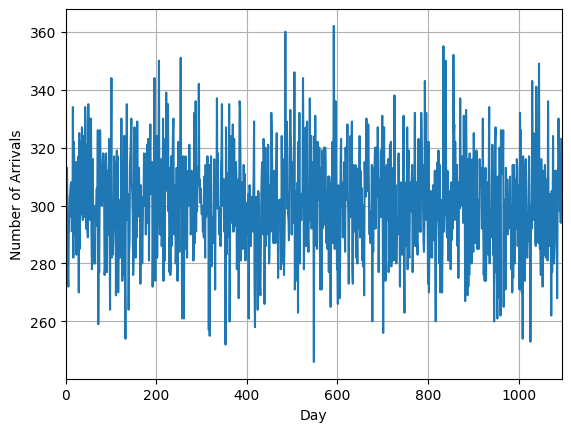

Average: 300.5552511415525 deviation: 17.369116751226855


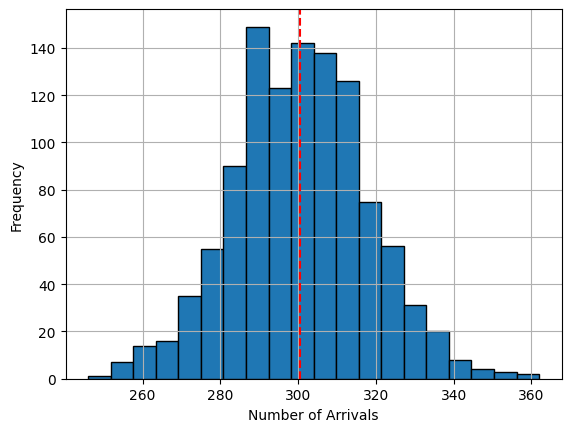

In [56]:
num_days = 365 * 3
y = [0 for i in range(num_days)]

for i in range(num_days):
    y[i] = arrival_simulation()

# Time series of the number of arrivals per day
plt.plot(range(num_days),y)
plt.xlabel('Day')
plt.ylabel('Number of Arrivals')
plt.xlim((0,num_days))
plt.grid()
plt.show()

# Histogram of the number of arrivals collected over a longer time
average = sum(y)/num_days;
deviation = math.sqrt(sum(map(lambda a: (a-average)*(a-average), y))/num_days) # Calculate variance and get root
print("Average: " + str(average) + " deviation: " + str(deviation))
plt.hist(y, bins=20, edgecolor="black")
plt.axvline(average, color="r", linestyle="dashed", label = 'Average')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Finally, use the histogram to answer the question posed in the beginning. You may want to make use of the concept of p-value used earlier in the course.

The p-value can be used to calculate the likelihood of observing 369 visitors in a single day based on the simulated data to determine the likelihood of the occurence being a fluctuation. 

We set the significance level to $\alpha = 0.05$ and use the sampling distribution made from the simulation to make a right-tailed test. The average in the sample is $300.5552511415525$ and the estimated deviation is $17.369116751226855$. The z-score is calculated $\frac{X-\mu}{\sigma} = 3.9406$, using $X = 369$ visitors, which means that $p = 0.0000406563$. $p < \alpha$ with a big margin so it is unlikely for 369 visitors to have visited one day randomly. It can also be seen in the histogram that days with over 360 visitors are quite rare.